In [1]:
from electroviz.streams.imec import ImecLF

im = ImecLF(["E:/RG001/catgt_ephys_g1/ephys_g1_imec1/"])

ImportError: cannot import name 'Imec' from 'electroviz.streams.imec' (C:\Ryan\GitHub\electroviz\electroviz\streams\imec.py)

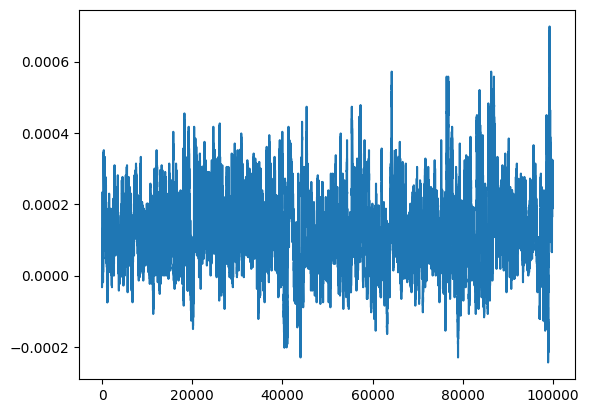

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(im[1].channels[383, :100000])

plt.show()